In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os

In [3]:
# No additional code needed as all necessary imports and variables are already defined in previous cells.


In [4]:
base_dir = os.getcwd()


print("Base directory: {}".format(base_dir))

def load_mat_file(path):
    """Load a .mat file and return the loaded data."""
    data = scipy.io.loadmat(path)
    return data

# Function to save figures
def save_figure(fig, filename, title=None):
    directory = os.path.join(base_dir, "Thesis Draft", "figures")
    report_file = os.path.join(base_dir, "Thesis Draft", "reports", "report1.tex")

    if not os.path.exists(directory):
        os.makedirs(directory)
    
    fig_path = os.path.join(directory, filename)
    fig.savefig(fig_path)

    if title is None:
        # Remove the file extension
        base_name = os.path.splitext(filename)[0]
        # Replace underscores with spaces and capitalize each word
        title = base_name.replace('_', ' ').title()

    # Check if the figure path is already in the file
    fig_include_str = fig_path.replace('\\', '/')
    with open(report_file, 'r') as f:
        content = f.read()
        if fig_include_str in content:
            return

    # Add the figure to the summary file
    with open(report_file, 'a') as f:
        f.write("\\begin{figure}[h]\n")
        f.write("\\centering\n")
        f.write("\\includegraphics[width=0.8\\textwidth]{{{}}}\n".format(fig_path.replace('\\', '/')))
        f.write("\\caption{{{}}}\n".format(title))
        f.write("\\end{figure}\n\n")

    plt.close(fig)

Base directory: c:\Users\barbo\brain classifier repo\brain_classifier\src


In [5]:
base_dir

'c:\\Users\\barbo\\brain classifier repo\\brain_classifier\\src'

In [6]:
# Load connectivity data from .mat file
data_path = os.path.join(base_dir, "..", "new_data", "scfc_schaefer100_ya_oa.mat")
data = load_mat_file(data_path)

# Load features from .mat files
mod_deg_zscore_path = os.path.join(base_dir, "..", "new_data", "mod_deg_zscore_scfc.mat")
part_coeff_path = os.path.join(base_dir, "..", "new_data", "part_coeff_scfc.mat")

mod_deg_zscore_data = load_mat_file(mod_deg_zscore_path)
part_coeff_data = load_mat_file(part_coeff_path)

# Extract the content of the 'data' key
data_content = data['data'][0, 0]

"""
# Print the fields in data_content
print("data_content fields:", data_content.dtype.names)
# Check if any field names suggest age information
for field in data_content.dtype.names:
    print(f"Field: {field}, Type: {type(data_content[field])}, Shape: {np.shape(data_content[field]) if hasattr(data_content[field], 'shape') else 'N/A'}")
"""

# Extract the connectivity matrices and store them in a dictionary
matrices = {
    'sc_ya': np.array(data_content['sc_ya']),
    'fc_ya': np.array(data_content['fc_ya']),
    'sc_oa': np.array(data_content['sc_oa']),
    'fc_oa': np.array(data_content['fc_oa'])
}

# Print the type and shape of the matrices
"""
for key, matrix in matrices.items():
    print(f"{key}: Type: {type(matrix)}, Shape: {matrix.shape}") 
    # sc_ya: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 101)
    # fc_ya: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 101)
    # sc_oa: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 78)
    # fc_oa: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 78)
"""

# Extract the age data and store them in a dictionary
ages = {
    'age_ya': np.array(data_content['age_ya']).flatten(),
    'age_oa': np.array(data_content['age_oa']).flatten()
}

# assume first 101 columns are the ya features, last 78 are the oa features
mod_deg_zscore = {
    'fc_ya': np.array(mod_deg_zscore_data['mdz_fc'][:, :101]),
    'fc_oa': np.array(mod_deg_zscore_data['mdz_fc'][:, 101:]),
    'sc_ya': np.array(mod_deg_zscore_data['mdz_sc'][:, :101]),
    'sc_oa': np.array(mod_deg_zscore_data['mdz_sc'][:, 101:])
}

part_coeff = {
    'fc_ya': np.array(part_coeff_data['pc_fc'][:, :101]),
    'fc_oa': np.array(part_coeff_data['pc_fc'][:, 101:]),
    'sc_ya': np.array(part_coeff_data['pc_sc'][:, :101]),
    'sc_oa': np.array(part_coeff_data['pc_sc'][:, 101:])
}

print("mod_deg_zscore['fc_ya'].shape:", mod_deg_zscore['fc_ya'].shape)
print("mod_deg_zscore['fc_oa'].shape:", mod_deg_zscore['fc_oa'].shape)

print("part_coeff['fc_ya'].shape:", part_coeff['fc_ya'].shape)
print("part_coeff['fc_oa'].shape:", part_coeff['fc_oa'].shape)


mod_deg_zscore['fc_ya'].shape: (100, 101)
mod_deg_zscore['fc_oa'].shape: (100, 78)
part_coeff['fc_ya'].shape: (100, 101)
part_coeff['fc_oa'].shape: (100, 78)


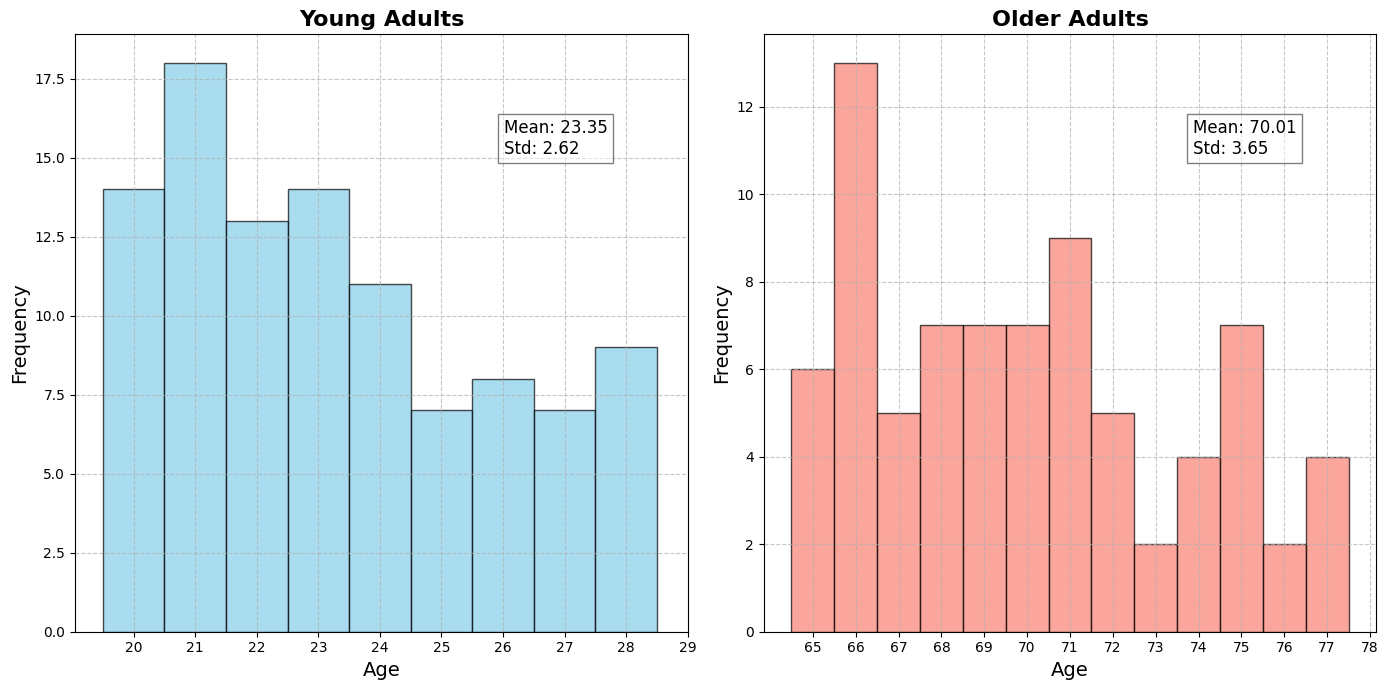

Mean age of young adults: 23.346534653465348, std: 2.6153985878927917
Mean age of older adults: 70.01282051282051, std: 3.6461908108768544


In [7]:
# Print a histogram of the ages
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Young Adults
ax[0].hist(ages['age_ya'], bins=np.unique(ages['age_ya']), color='skyblue', alpha=0.7, edgecolor='black', align='mid')
ax[0].set_title("Young Adults", fontsize=16, fontweight='bold')
ax[0].set_xlabel("Age", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_xticks(np.unique(ages['age_ya']) + 0.5 )  # Set the ticks at the unique ages
ax[0].set_xticklabels(np.unique(ages['age_ya']))  # Adjust the labels to be 0.5 less
ax[0].grid(True, linestyle='--', alpha=0.7)

# Older Adults
ax[1].hist(ages['age_oa'], bins=np.unique(ages['age_oa']), color='salmon', alpha=0.7, edgecolor='black', align='mid')
ax[1].set_title("Older Adults", fontsize=16, fontweight='bold')
ax[1].set_xlabel("Age", fontsize=14)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_xticks(np.unique(ages['age_oa']) + 0.5)  # Set the ticks at the unique ages
ax[1].set_xticklabels(np.unique(ages['age_oa']))  # Adjust the labels to be 0.5 less
ax[1].grid(True, linestyle='--', alpha=0.7)

# Adjust spacing
plt.tight_layout()

# Add annotations for mean and std
mean_ya = np.mean(ages['age_ya'])
std_ya = np.std(ages['age_ya'])
mean_oa = np.mean(ages['age_oa'])
std_oa = np.std(ages['age_oa'])

ax[0].annotate(f'Mean: {mean_ya:.2f}\nStd: {std_ya:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax[1].annotate(f'Mean: {mean_oa:.2f}\nStd: {std_oa:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# print the mean and std of the ages
print(f"Mean age of young adults: {mean_ya}, std: {std_ya}")
print(f"Mean age of older adults: {mean_oa}, std: {std_oa}")

In [8]:
# Check feasibility of the matrices

def check_symetric(matrix):
    """Check if a matrix is symmetric."""
    return np.allclose(matrix, matrix.T)

def check_zero_diagonal(matrix):
    """Check if the diagonal of a matrix is zero."""
    return np.allclose(np.diag(matrix), 0)

def check_dimensions(matrix, expected_shape=(100, 100)):
    """Check if the matrix has the expected shape."""
    return matrix.shape == expected_shape

# Check the properties of the matrices
"""
def check_properties(matrices):
    for key, matrix in matrices.items():
        age_group, matrix_type = key.split('_')
        num_subjects = matrix.shape[2]

        for i in range(num_subjects):
            symmetric = check_symetric(matrix[:, :, i])
            zero_diagonal = check_zero_diagonal(matrix[:, :, i])
            correct_shape = check_dimensions(matrix[:, :, i], (100, 100))
            
            if not symmetric or not zero_diagonal or not correct_shape:
                print(f"{matrix_type.upper()} {age_group.capitalize()} Subject {i+1}:")
                if not symmetric:
                    print(" Not Symmetric ")
                if not zero_diagonal:
                    print(" Diagonal is not Zero ")
                if not correct_shape:
                    print(" Incorrect Shape ")

# Check properties of matrices

check_properties(matrices)
"""

'\ndef check_properties(matrices):\n    for key, matrix in matrices.items():\n        age_group, matrix_type = key.split(\'_\')\n        num_subjects = matrix.shape[2]\n\n        for i in range(num_subjects):\n            symmetric = check_symetric(matrix[:, :, i])\n            zero_diagonal = check_zero_diagonal(matrix[:, :, i])\n            correct_shape = check_dimensions(matrix[:, :, i], (100, 100))\n            \n            if not symmetric or not zero_diagonal or not correct_shape:\n                print(f"{matrix_type.upper()} {age_group.capitalize()} Subject {i+1}:")\n                if not symmetric:\n                    print(" Not Symmetric ")\n                if not zero_diagonal:\n                    print(" Diagonal is not Zero ")\n                if not correct_shape:\n                    print(" Incorrect Shape ")\n\n# Check properties of matrices\n\ncheck_properties(matrices)\n'

In [9]:
import networkx as nx

In [10]:
# preprocessing?


# Convert matrices to graphs
def matrix_to_graph(matrix):
    """Convert a matrix to a graph."""
    # matrix = np.array(matrix)
    graph = nx.from_numpy_array(matrix) 
    return graph


graphs = {}

for key, matrix in matrices.items():
    num_subjects = matrix.shape[2]
    graphs[key] = [matrix_to_graph(matrix[:, :, i]) for i in range(num_subjects)] #list of graphs

In [11]:
# Visualize the graphs

# plot node degree histogram and distribution from https://github.com/gordicaleksa/pytorch-GAT/blob/main/The%20Annotated%20GAT%20(Cora).ipynb

def plot_graph_on_axis(graph, ax, title, pos=None, partition=None):
    """Plot a graph on a given axis with node sizes proportional to the degree and edge widths proportional to the edge weights. 
        If partition is provided, nodes are colored by their community."""
    ax.set_title(title)

    # Extract edge weights
    edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]
    # Apply min-max normalization for edge thickness
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    if min_weight != max_weight:  # Avoid division by zero
        edge_weights = [(w - min_weight) / (max_weight - min_weight) for w in edge_weights]
    else:
        edge_weights = [1 for _ in edge_weights]  # If all weights are the same, set them to 1

    # Calculate the degree of each node for node size
    degrees = dict(graph.degree())
    # Normalize the degrees to the range 0-1
    max_degree = max(degrees.values())
    min_degree = min(degrees.values())
    normalized_degrees = {node: (degree - min_degree) / (max_degree - min_degree) for node, degree in degrees.items()}
    # Set node sizes based on normalized degrees
    node_sizes = [(normalized_degrees[node] + 0.1) * 5 for node in graph.nodes()]  

    if partition:
        # If partition is provided, color nodes by their community
        cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
        node_color = list(partition.values())
    else:
        node_color = 'steelblue'
    
    # Draw the graph
    if pos is None:
        pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, ax=ax, node_size=node_sizes, with_labels=False, node_color=node_color, cmap=cmap if partition else None, edge_color='gray', width=edge_weights)

    return pos


def plot_and_save_graph(graphs, filename=None, positions=None, partitions=None, status="Original", with_communities=False, num_subjects=1):
    """
    Plot and save graphs for different age groups on a grid of subplots.
    
    Parameters:
    - graphs: Dictionary containing NetworkX graphs for each age group and matrix type
    - filename: name.png
    - positions: List of positions for the graphs
    - partitions: Dictionary containing partitions for the graphs of each age group and matrix type
    - status: 'Original', 'Preprocessed', or 'Louvain Preprocessed'
    - num_subjects: Number of subjects to plot (default is 1)
    """
    community_text = " with Louvain Communities" if with_communities else ""
    title = f'{status} Graphs{community_text}'
    fig, axs = plt.subplots(4, num_subjects, figsize=(15, 9))
    fig.suptitle(title, fontsize=16)

    if positions is None:
        positions = {}
    
    if partitions is None:
        partitions = {key: [None] * num_subjects for key in graphs.keys()}

    # TODO
    """for j, (key, graph_list) in enumerate(graphs.items()):
        age_group, matrix_type = key.split('_')
        title_prefix = matrix_type.upper()
        for i in range(min(num_subjects, len(graph_list))):
            if len(positions.get(key, [])) > i:
                pos = positions[key][i]
                plot_graph_on_axis(graph_list[i], axs[j, i], f"{key.upper()} Graph {i+1}", pos, partitions[key][i] if partitions[key] else None)
            else:
                pos = plot_graph_on_axis(graph_list[i], axs[j, i], f"{key.upper()} Graph {i+1}", partition=partitions[key][i] if partitions[key] else None)
                if key not in positions:
                    positions[key] = []
                positions[key].append(pos)"""

    plt.tight_layout()
    #plt.show()
    
    if filename:
        save_figure(fig, filename, title)
    
    plt.close(fig)

    return positions



# plot_and_save_graph(graphs, filename='graphs.png', status=' ', num_subjects=1)

In [12]:
import torch
import scipy.stats
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
#from torch_geometric.nn import GATConv
from torch.utils.data import Dataset, random_split, Subset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader


In [13]:
# Topological measures that significantly change with age across the lifespan
# different among structural and functional networks?

# functional connectivity topological measures
# from Cao 2014 
# Local efficiency (inverted U shape) (sex differences only in global?)
# Modularity (decrease linearly) ( without global signal regression modularity failed to detect age effects)
# Mean connectivity strength (negative quadratic trajectories)
# Normalized Rich Club coefficients (inverse U shape over a range of hub thresholds) (no significant sex differences)
# Regional Functional Connectivity Strength (rFCS) (Age-related linear and quadratic changes both positive and negative) (male higher connectivity strength in some areas)
# participation coefficient?
# centrality measures? (sub-graph centrality)

# structural connectivity topological measures

# participation coefficient
# contribution to modularity

# matching index
def calculate_sc_features(matrix, mod_deg_zscore, part_coeff, mod_deg_zscore_fc=None, part_coeff_fc=None):
    """Calculate node features from a structural connectivity matrix.
    Features are from connectivity statistics: mean, standard deviation, kurtosis, skewness,
    degree centrality of the node's connectivity vector to all the other nodes (Yang 2019),
    modular degree z-score, and participation coefficient.
    
    If fc_matrix, mod_deg_zscore_fc, and part_coeff_fc are provided, both structural and functional features are combined.
    """
    num_subjects = matrix.shape[2]
    all_subjects_features = []
    feature_names = ['mean', 'std', 'skewness', 'kurtosis', 'mod_deg_zscore', 'part_coeff']

    if mod_deg_zscore_fc is not None and part_coeff_fc is not None:
        feature_names += ['mod_deg_zscore_fc', 'part_coeff_fc']

    for s in range(num_subjects):
        node_features = []
        for i in range(matrix.shape[0]):
            connections = matrix[i, :, s].flatten()
            stats = [connections.mean(), connections.std(), scipy.stats.skew(connections), scipy.stats.kurtosis(connections)]
            mod_part = [mod_deg_zscore[i, s], part_coeff[i, s]]
            sc_features = stats + mod_part
            
            if mod_deg_zscore_fc is not None and part_coeff_fc is not None:
                fc_features = [mod_deg_zscore_fc[i, s], part_coeff_fc[i, s]]
                combined_features = sc_features + fc_features
                node_features.append(combined_features)
            else:
                node_features.append(sc_features)
        
        all_subjects_features.append(torch.tensor(node_features, dtype=torch.float32))
    
    return all_subjects_features, feature_names  # list of tensors and feature names


#TODO: Capire se c'è variabilità nelle feature (valori medi, istogramma)
# dimensionality reduction (PCA, autoencoders) or feature selections to decrease the number of features?
def create_graphs_with_features(matrix, feature_tensor=None, feature_type='random'):
    """Combine a connectivity matrix and a feature tensor into a single graph.
    Graphs are constructed from the connectivity matrix and the node features 
    consist of the provided feature tensor. If feature_tensor is not provided,
    the user can choose between using a random tensor or an identity tensor.
    
    Parameters:
    - matrix: The connectivity matrix.
    - feature_tensor: List of feature tensors. If None, feature_type is used.
    - feature_type: The type of tensor to use if feature_tensor is None. Options are 'random' or 'identity'.
    """
    
    # Turn matrix into torch tensor
    tensor_matrix = torch.tensor(matrix, dtype=torch.float)

    # Initialize empty list for storing graph data objects
    graph_list = []

    # Determine the number of subjects and nodes
    num_subjects = tensor_matrix.shape[2]
    num_nodes = tensor_matrix.shape[0]

    # Generate feature tensor if not provided
    if feature_tensor is None:
        if feature_type == 'random':
            feature_tensor = [torch.rand((num_nodes, 4), dtype=torch.float32) for _ in range(num_subjects)]
        elif feature_type == 'identity':
            feature_tensor = [torch.eye(num_nodes, dtype=torch.float32) for _ in range(num_subjects)]
        else:
            raise ValueError("Invalid feature_type. Choose 'random' or 'identity'.")
    # create edge and edge weight lists for each subject
    for i in range(num_subjects):
        # Set edges for the graph as in tensor_matrix
        edges = []
        edge_weights = []
        for j in range(num_nodes):
            for k in range(j+1, num_nodes):
                weight = tensor_matrix[j, k, i]
                # Remove null edges? (Yang doesn't)  
                # Add both directions since undirected?
                if weight != 0:  # Remove null edges
                    edges.append([j, k])
                    edges.append([k, j])
                    edge_weights.append(weight)
                    edge_weights.append(weight)

        # Convert graph edges in form of torch tensor of size (2, num_edges)
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous() 

        # Convert graph edge weights in form of torch tensor 
        edge_weights = torch.tensor(edge_weights, dtype=torch.float32)

        # Create graph data object
        data = Data(x=feature_tensor[i], edge_index=edge_index, edge_attr=edge_weights)
        
        # Append the graph data object to the list
        graph_list.append(data)

    return graph_list


# Calculate node features for both structural and functional matrices
features = {
    'sc_ya': calculate_sc_features(matrices['sc_ya'], mod_deg_zscore['sc_ya'], part_coeff['sc_ya']), #tuple of list of tensors and feature names
    'sc_oa': calculate_sc_features(matrices['sc_oa'], mod_deg_zscore['sc_oa'], part_coeff['sc_oa']),
}


In [14]:
features['combined_ya'] = calculate_sc_features(matrices['sc_ya'], mod_deg_zscore['sc_ya'], part_coeff['sc_ya'], mod_deg_zscore_fc=mod_deg_zscore['fc_ya'], part_coeff_fc=part_coeff['fc_ya'])
features['combined_oa'] = calculate_sc_features(matrices['sc_oa'], mod_deg_zscore['sc_oa'], part_coeff['sc_oa'], mod_deg_zscore_fc=mod_deg_zscore['fc_oa'], part_coeff_fc=part_coeff['fc_oa'])

In [15]:
print("Length of features['sc_ya']:", len(features['sc_ya']))
print("Length of features['sc_oa']:", len(features['sc_oa']))
print("Length of features['combined_ya']:", len(features['combined_ya']))
print("Length of features['combined_oa']:", len(features['combined_oa']))

print(f'Shape of features["sc_ya"]: {features["sc_ya"][0][0].shape}')
print(f'Shape of features["sc_oa"]: {features["sc_oa"][0][0].shape}')
print(f'Shape of features["combined_ya"]: {features["combined_ya"][0][0].shape}')
print(f'Shape of features["combined_oa"]: {features["combined_oa"][0][0].shape}')

Length of features['sc_ya']: 2
Length of features['sc_oa']: 2
Length of features['combined_ya']: 2
Length of features['combined_oa']: 2
Shape of features["sc_ya"]: torch.Size([100, 6])
Shape of features["sc_oa"]: torch.Size([100, 6])
Shape of features["combined_ya"]: torch.Size([100, 8])
Shape of features["combined_oa"]: torch.Size([100, 8])


combined_ya - Subject 0 - Mean: tensor([3.7498e-02, 1.3073e-01, 5.0493e+00, 2.9747e+01, 0.0000e+00, 5.4539e-01,
        4.7684e-09, 6.0505e-01]), Standard Deviation: tensor([ 0.0206,  0.0875,  1.4581, 18.0013,  0.9640,  0.1673,  0.9587,  0.1195])
combined_oa - Subject 0 - Mean: tensor([ 4.3387e-02,  1.4134e-01,  4.9884e+00,  2.9467e+01, -9.5367e-09,
         5.6227e-01, -4.7684e-09,  6.3359e-01]), Standard Deviation: tensor([ 0.0217,  0.0758,  1.3979, 16.8489,  0.9640,  0.1898,  0.9640,  0.0903])


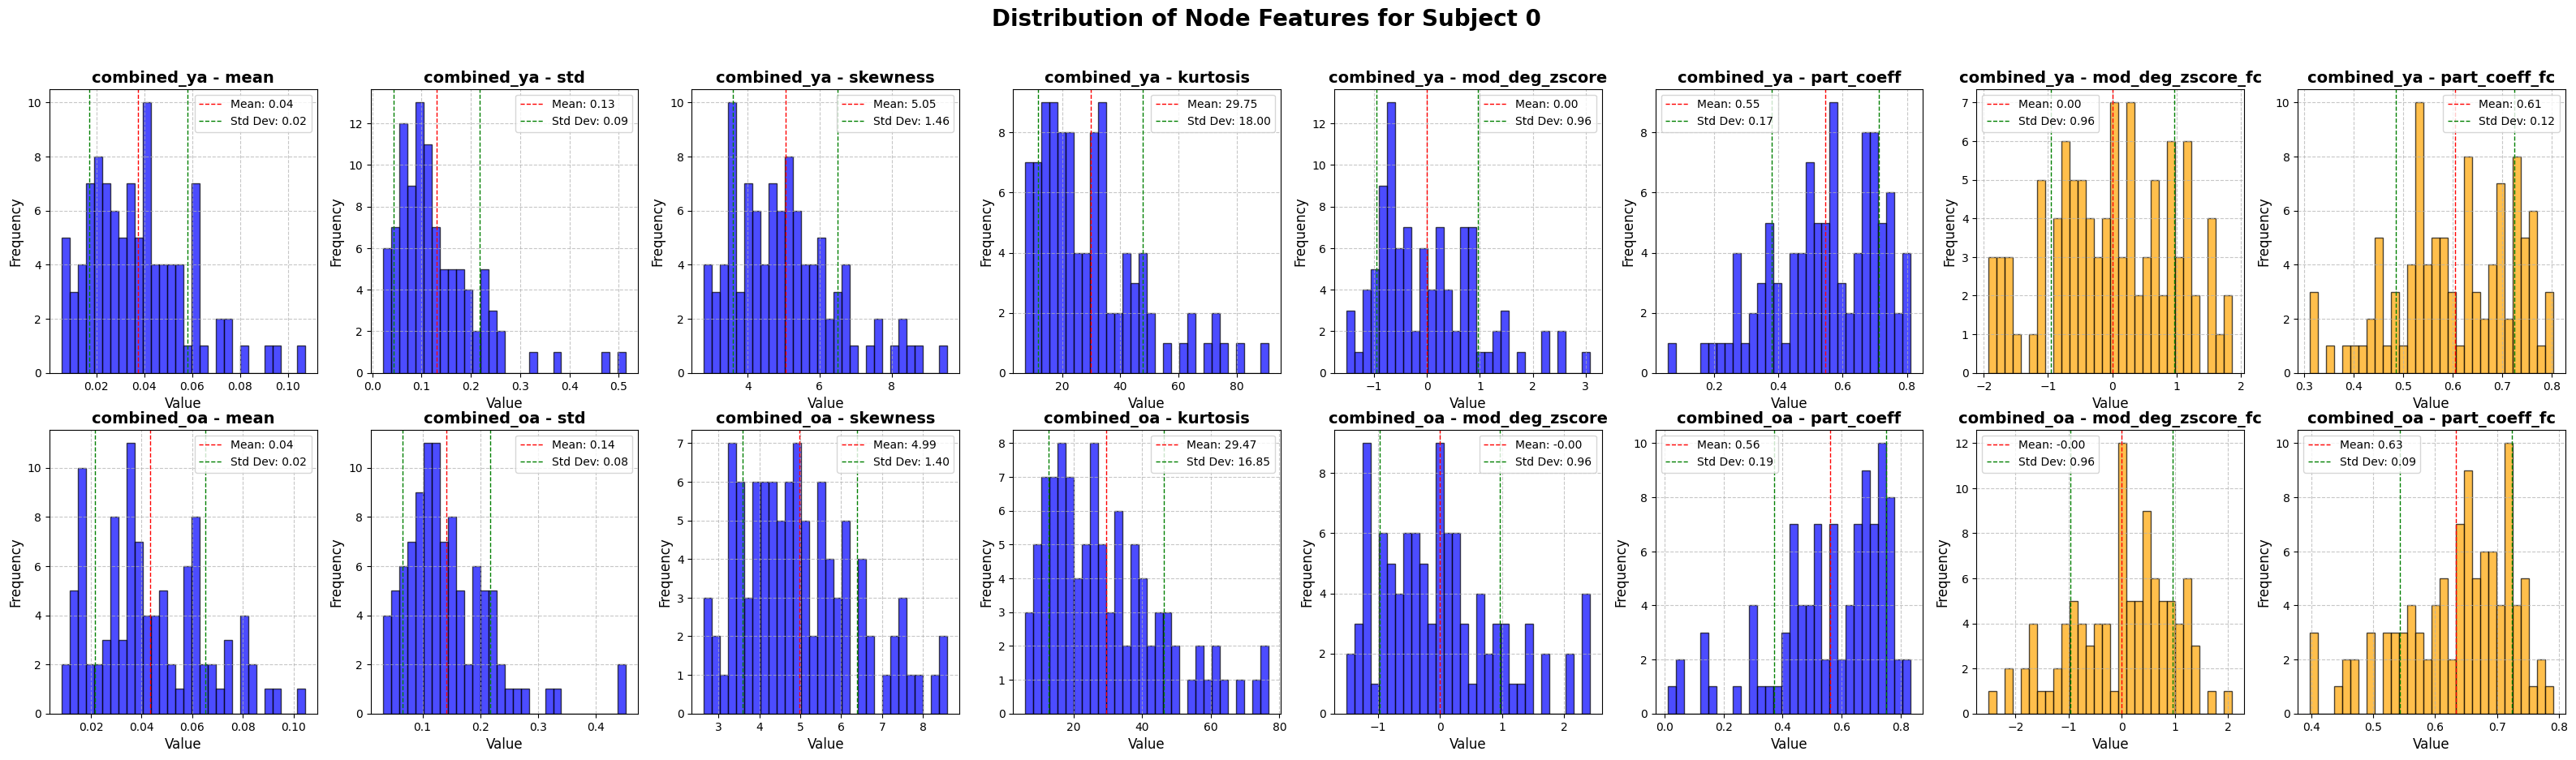

In [16]:
def plot_feature_distribution(features, subject_index, combined=False):
    if combined:
        filtered_features = {key: value for key, value in features.items() if 'combined' in key}
    else:
        filtered_features = {key: value for key, value in features.items() if 'combined' not in key}

    num_keys = len(filtered_features)
    feature_counts = {key: (filtered_features[key][0][0]).shape[1] for key in filtered_features.keys()}  # finds if number of features is 6 or 8
    max_features = max(feature_counts.values())  # 8

    fig, axs = plt.subplots(num_keys, max_features, figsize=(max_features * 5, num_keys * 5))
    fig.suptitle(f'Distribution of Node Features for Subject {subject_index}', fontsize=20, fontweight='bold')

    for row, (key, (values, feature_names)) in enumerate(filtered_features.items()):
        num_features = feature_counts[key]
        subject_values = values[subject_index]  # Get the values for the specified subject

        mean = torch.mean(subject_values, dim=0)  # Shape: (num_features)
        std_dev = torch.std(subject_values, dim=0)  # Shape: (num_features)

        print(f"{key} - Subject {subject_index} - Mean: {mean}, Standard Deviation: {std_dev}")

        for col in range(num_features):
            ax = axs[row, col] if num_keys > 1 else axs[col]
            color = 'blue' if not combined or feature_names[col] not in ['mod_deg_zscore_fc', 'part_coeff_fc'] else 'orange'
            ax.hist(subject_values[:, col].flatten().numpy(), bins=30, alpha=0.7, color=color, edgecolor='black')
            ax.set_title(f'{key} - {feature_names[col]}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Value', fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.axvline(mean[col].item(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean[col]:.2f}')
            ax.axvline(mean[col].item() + std_dev[col].item(), color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {std_dev[col]:.2f}')
            ax.axvline(mean[col].item() - std_dev[col].item(), color='green', linestyle='dashed', linewidth=1)
            ax.legend()

        # Hide any unused subplots in the row
        for col in range(num_features, max_features):
            ax = axs[row, col] if num_keys > 1 else axs[col]
            ax.axis('off')

# Example usage:
plot_feature_distribution(features, subject_index=0, combined=True)

In [17]:
# Each element is a list of graph data objects
#TODO: stack functional and structural features together?
#TODO: using multi-edge connections instead of separate modalities?
graphs_with_features = {
    'sc_ya': create_graphs_with_features(matrices['sc_ya'], feature_tensor=features['sc_ya'][0]),
    'sc_oa': create_graphs_with_features(matrices['sc_oa'], feature_tensor=features['sc_oa'][0]),
    'sc_combined_ya': create_graphs_with_features(matrices['sc_ya'], feature_tensor=features['combined_ya'][0]),
    'sc_combined_oa': create_graphs_with_features(matrices['sc_oa'], feature_tensor=features['combined_oa'][0]),
}

In [18]:
#check that features and graphs diensions are right
"""
print("length of sc_ya features:", len(features['sc_ya']))
print("length of sc_oa features:", len(features['sc_oa']))
print("length of combined_ya features:", len(features['combined_ya']))
print("length of combined_oa features:", len(features['combined_oa']))
"""
"""
print("length of sc_ya graphs:", len(combined_graphs['sc_ya']))
print("length of sc_oa graphs:", len(combined_graphs['sc_oa']))
print("length of combined_ya graphs:", len(combined_graphs['sc_combined_ya']))
print("length of combined_oa graphs:", len(combined_graphs['sc_combined_oa']))
"""
"""
print("shape of first element od features['sc_ya']:", features['sc_ya'][0].shape)
print("shape of first element od features['sc_oa']:", features['sc_oa'][0].shape)
print("shape of first element od features['combined_ya']:", features['combined_ya'][0].shape)
print("shape of first element od features['combined_oa']:", features['combined_oa'][0].shape)
"""
"""
print("shape of first element od combined_graphs['sc_ya']:", combined_graphs['sc_ya'][0].x.shape)
print("shape of first element od combined_graphs['sc_oa']:", combined_graphs['sc_oa'][0].x.shape)
print("shape of first element od combined_graphs['sc_combined_ya']:", combined_graphs['sc_combined_ya'][0].x.shape)
print("shape of first element od combined_graphs['sc_combined_oa']:", combined_graphs['sc_combined_oa'][0].x.shape)
"""

'\nprint("shape of first element od combined_graphs[\'sc_ya\']:", combined_graphs[\'sc_ya\'][0].x.shape)\nprint("shape of first element od combined_graphs[\'sc_oa\']:", combined_graphs[\'sc_oa\'][0].x.shape)\nprint("shape of first element od combined_graphs[\'sc_combined_ya\']:", combined_graphs[\'sc_combined_ya\'][0].x.shape)\nprint("shape of first element od combined_graphs[\'sc_combined_oa\']:", combined_graphs[\'sc_combined_oa\'][0].x.shape)\n'

In [19]:
# Print the len of the combined graphs

graphs_sc = graphs_with_features['sc_ya'] + graphs_with_features['sc_oa']
labels_sc = [0]*len(graphs_with_features['sc_ya']) + [1]*len(graphs_with_features['sc_oa'])
#dataset_sc = list(zip(graphs_sc, labels_sc))


graphs_sc_combined = graphs_with_features['sc_combined_ya'] + graphs_with_features['sc_combined_oa']
labels_sc_combined = [0]*len(graphs_with_features['sc_combined_ya']) + [1]*len(graphs_with_features['sc_combined_oa'])


In [20]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import dgl
from dgl.dataloading import GraphDataLoader


c:\Users\barbo\brain classifier repo\brain_classifier\.venv\lib\site-packages\torchdata\datapipes\__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()
c:\Users\barbo\brain classifier repo\brain_classifier\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# Split the data with stratification into training and temp sets
train_data_sc, temp_data_sc, train_labels_sc, temp_labels_sc = train_test_split(graphs_sc, labels_sc, test_size=0.3, random_state=42, stratify=labels_sc)
train_data_sc_combined, temp_data_sc_combined, train_labels_sc_combined, temp_labels_sc_combined = train_test_split(graphs_sc_combined, labels_sc_combined, test_size=0.3, random_state=42, stratify=labels_sc_combined)

# Further split the temp set into validation and test sets
val_data_sc, test_data_sc, val_labels_sc, test_labels_sc = train_test_split(temp_data_sc, temp_labels_sc, test_size=0.5, random_state=42, stratify=temp_labels_sc)
val_data_sc_combined, test_data_sc_combined, val_labels_sc_combined, test_labels_sc_combined = train_test_split(temp_data_sc_combined, temp_labels_sc_combined, test_size=0.5, random_state=42, stratify=temp_labels_sc_combined)

# Print the shapes of the split data
print(f'train_data_sc len: {len(train_data_sc)}, type: {type(train_data_sc)}') 
print(f'val_data_sc len: {len(val_data_sc)}, type: {type(val_data_sc)}')
print(f'test_data_sc len: {len(test_data_sc)}, type: {type(test_data_sc)}')
print(f'train_labels_sc len: {len(train_labels_sc)}, type: {type(train_labels_sc)}')
print(f'val_labels_sc len: {len(val_labels_sc)}, type: {type(val_labels_sc)}')
print(f'test_labels_sc len: {len(test_labels_sc)}, type: {type(test_labels_sc)}')

# print the shape of the first element in the train_data_sc

print(f'train_data_sc[0] shape: {train_data_sc[0].x.shape}')
print(f'train_data_sc[0] edge_index shape: {train_data_sc[0].edge_index.shape}')



train_data_sc len: 125, type: <class 'list'>
val_data_sc len: 27, type: <class 'list'>
test_data_sc len: 27, type: <class 'list'>
train_labels_sc len: 125, type: <class 'list'>
val_labels_sc len: 27, type: <class 'list'>
test_labels_sc len: 27, type: <class 'list'>
train_data_sc[0] shape: torch.Size([100, 6])
train_data_sc[0] edge_index shape: torch.Size([2, 3460])


In [22]:
# prevent data leakage 
# normalize the features 

def normalize_features(train_graphs, val_graphs, test_graphs):
    def compute_normalization_params(graphs):
        all_values = torch.cat([graph.x for graph in graphs], dim=0)
        mean = all_values.mean(dim=0)
        std = all_values.std(dim=0)
        return mean, std

    def apply_normalization(graphs, mean, std):
        normalized_graphs = []
        for graph in graphs:
            normalized_features = torch.zeros_like(graph.x)
            for j in range(graph.x.shape[1]):
                feature_values = graph.x[:, j]
                if std[j] != 0:
                    normalized_features[:, j] = (feature_values - mean[j]) / std[j]
                else:
                    normalized_features[:, j] = feature_values - mean[j]
            graph.x = normalized_features
            normalized_graphs.append(graph)
        return normalized_graphs

    mean, std = compute_normalization_params(train_graphs)
    normalized_train_graphs = apply_normalization(train_graphs, mean, std)
    normalized_val_graphs = apply_normalization(val_graphs, mean, std)
    normalized_test_graphs = apply_normalization(test_graphs, mean, std)

    return normalized_train_graphs, normalized_val_graphs, normalized_test_graphs

# Assuming train_data_sc, val_data_sc, and test_data_sc are defined
normalized_train_graphs_sc, normalized_val_graphs_sc, normalized_test_graphs_sc = normalize_features(train_data_sc, val_data_sc, test_data_sc)

normalized_train_graphs_sc_combined, normalized_val_graphs_sc_combined, normalized_test_graphs_sc_combined = normalize_features(train_data_sc_combined, val_data_sc_combined, test_data_sc_combined)


Graph 0 - Mean: tensor([ 1.6384e-01,  5.2596e-02, -1.8910e-01, -1.8908e-01,  9.5367e-09,
         3.0044e-01, -1.1921e-08, -1.0741e+00]), Standard Deviation: tensor([1.0980, 0.9339, 0.8515, 0.8313, 1.0055, 0.9019, 1.0038, 1.2449])


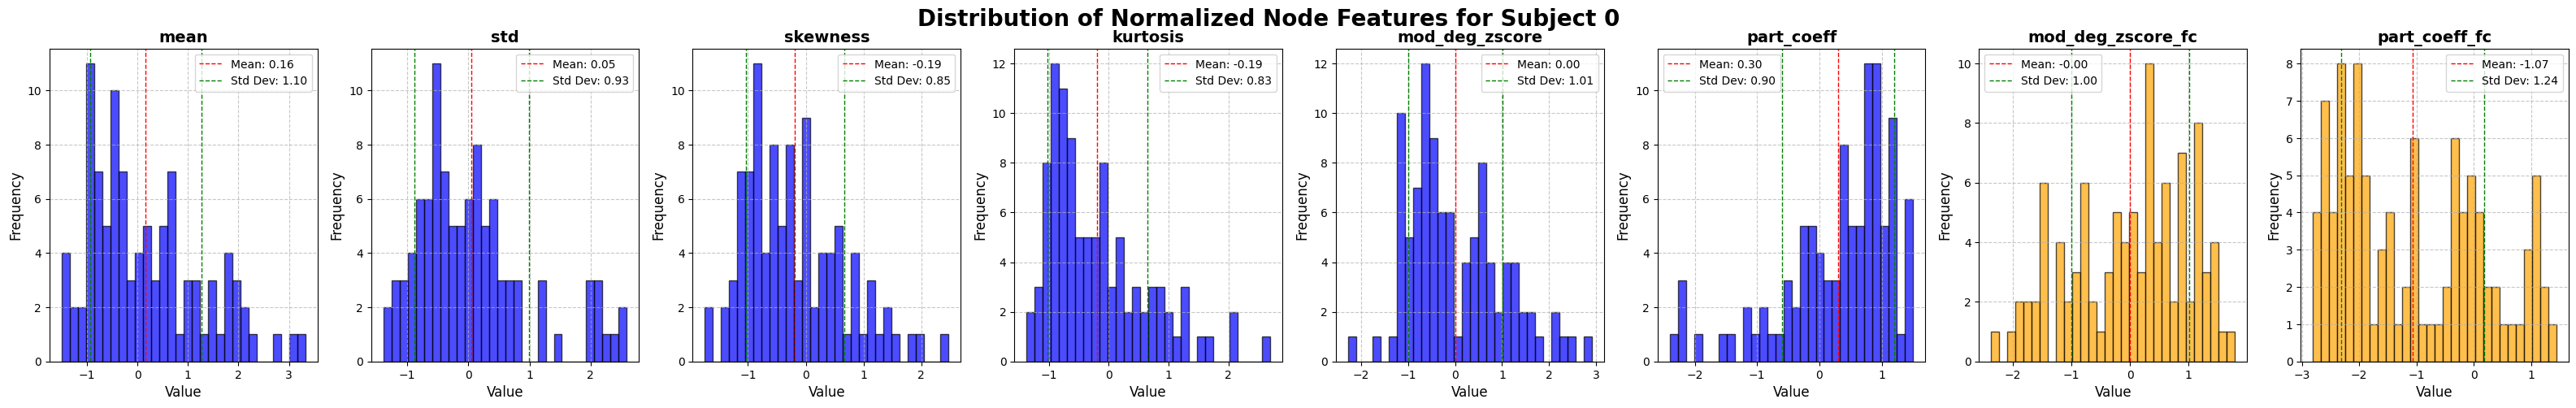

In [23]:
def plot_feature_distribution_from_graph(graphs, subject_index, feature_names):
    # Determine the number of features based on the first graph
    feature_counts = graphs[0].x.shape[1]
    num_keys = len(graphs)
    max_features = feature_counts  # Maximum number of features

    fig, axs = plt.subplots(1, max_features, figsize=(max_features * 5, 5))
    fig.suptitle(f'Distribution of Normalized Node Features for Subject {subject_index}', fontsize=20, fontweight='bold')
    # Select the specified subject
    graph = graphs[subject_index]
    subject_values = graph.x  # Get the nodal features

    mean = torch.mean(subject_values, dim=0)  # Shape: (num_features)
    std_dev = torch.std(subject_values, dim=0)  # Shape: (num_features)

    print(f"Graph {subject_index} - Mean: {mean}, Standard Deviation: {std_dev}")

    for col in range(feature_counts):
        ax = axs[col]
        if feature_counts == 8:
            color = 'blue' if col < (feature_counts - 2) else 'orange'
        else:
            color = 'blue'
        ax.hist(subject_values[:, col].flatten().numpy(), bins=30, alpha=0.7, color=color, edgecolor='black')
        ax.set_title(f'{feature_names[col]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Value', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.axvline(mean[col].item(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean[col]:.2f}')
        ax.axvline(mean[col].item() + std_dev[col].item(), color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {std_dev[col]:.2f}')
        ax.axvline(mean[col].item() - std_dev[col].item(), color='green', linestyle='dashed', linewidth=1)
        ax.legend()

    # Hide any unused subplots in the row
    for col in range(feature_counts, max_features):
        ax = axs[col] if num_keys == 1 else axs[0, col]
        ax.axis('off')

# Example usage:
plot_feature_distribution_from_graph(normalized_train_graphs_sc_combined, subject_index=0, feature_names=features['combined_ya'][1])


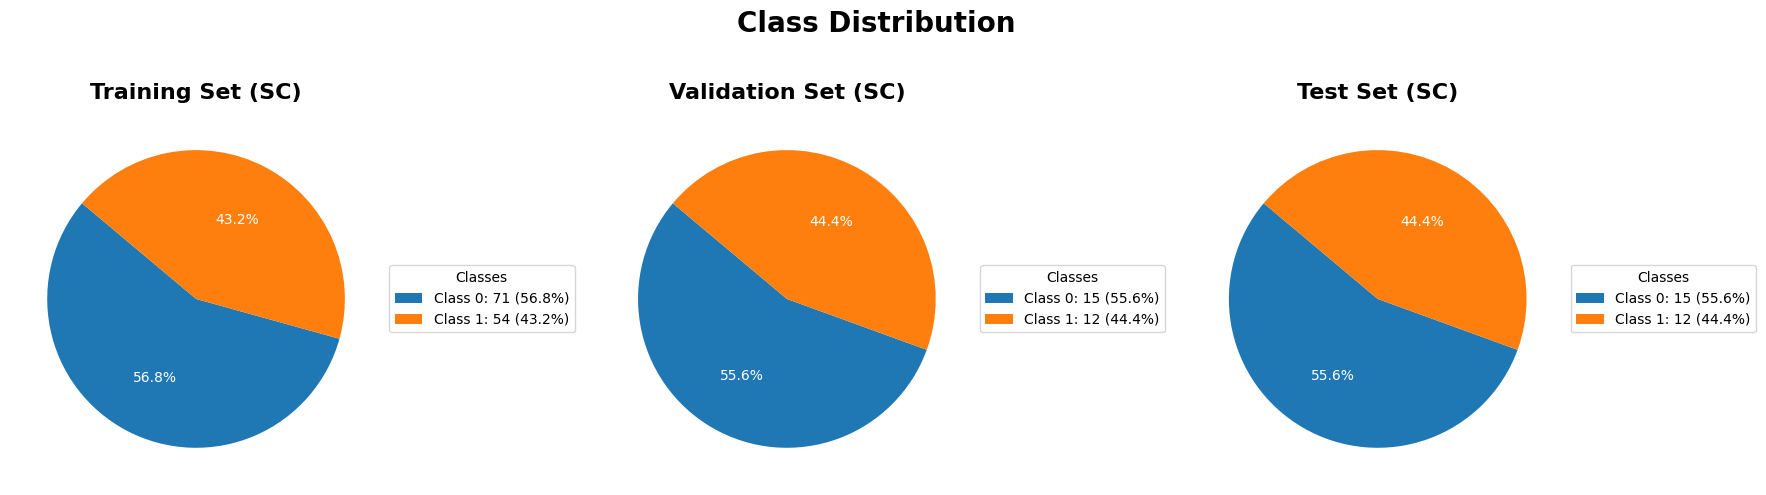

"\n# Create a new figure with 3 subplots for sc_combined\nfig, axs = plt.subplots(1, 3, figsize=(18, 5))\nfig.suptitle('Class Distribution', fontsize=20, fontweight='bold')\n\n# Plot class distribution for training, validation, and test sets for sc_combined\nplot_class_distribution_pie(train_labels_sc_combined, 'Training Set (SC Combined)', axs[0])\nplot_class_distribution_pie(val_labels_sc_combined, 'Validation Set (SC Combined)', axs[1])\nplot_class_distribution_pie(test_labels_sc_combined, 'Test Set (SC Combined)', axs[2])\n\nplt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title\nplt.show()\n"

In [24]:
# Check for class imbalance
def plot_class_distribution_pie(labels, title, ax):
    unique, counts = np.unique(labels, return_counts=True)
    total = sum(counts)
    percentages = (counts / total) * 100
    colors = ['#1f77b4', '#ff7f0e']
    
    wedges, texts, autotexts = ax.pie(counts, labels=unique, autopct='%1.1f%%', colors=colors, startangle=140, textprops=dict(color="w"))
    
    # Add a legend
    ax.legend(wedges, [f'Class {int(label)}: {count} ({percentage:.1f}%)' for label, count, percentage in zip(unique, counts, percentages)],
              title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title(title, fontsize=16, fontweight='bold', pad=10)

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Class Distribution', fontsize=20, fontweight='bold')

# Plot class distribution for training, validation, and test sets for sc
plot_class_distribution_pie(train_labels_sc, 'Training Set (SC)', axs[0])
plot_class_distribution_pie(val_labels_sc, 'Validation Set (SC)', axs[1])
plot_class_distribution_pie(test_labels_sc, 'Test Set (SC)', axs[2])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.show()

"""
# Create a new figure with 3 subplots for sc_combined
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Class Distribution', fontsize=20, fontweight='bold')

# Plot class distribution for training, validation, and test sets for sc_combined
plot_class_distribution_pie(train_labels_sc_combined, 'Training Set (SC Combined)', axs[0])
plot_class_distribution_pie(val_labels_sc_combined, 'Validation Set (SC Combined)', axs[1])
plot_class_distribution_pie(test_labels_sc_combined, 'Test Set (SC Combined)', axs[2])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.show()
"""

In [25]:
# Create a PyTorch dataset as a subclass of torch.utils.data.Dataset
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

def to_dgl(pyg_data):
    """Convert PyTorch Geometric Data to DGLGraph."""
    g = dgl.graph((pyg_data.edge_index[0], pyg_data.edge_index[1]))
    g.ndata['feat'] = pyg_data.x
    g.edata['weight'] = pyg_data.edge_attr
    return g

class GraphDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = [to_dgl(graph) for graph in graphs]
        self.labels = labels

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        graph = self.graphs[idx]
        label = self.labels[idx]
        return graph, label


In [26]:
train_data_sc = normalized_train_graphs_sc
val_data_sc = normalized_val_graphs_sc
test_data_sc = normalized_test_graphs_sc

train_data_sc_combined = normalized_train_graphs_sc_combined
val_data_sc_combined = normalized_val_graphs_sc_combined
test_data_sc_combined = normalized_test_graphs_sc_combined

In [27]:
# Create the datasets
train_dataset_sc = GraphDataset(train_data_sc, train_labels_sc)
val_dataset_sc = GraphDataset(val_data_sc, val_labels_sc)
test_dataset_sc = GraphDataset(test_data_sc, test_labels_sc)

train_dataset_sc_combined = GraphDataset(train_data_sc_combined, train_labels_sc_combined)
val_dataset_sc_combined = GraphDataset(val_data_sc_combined, val_labels_sc_combined)
test_dataset_sc_combined = GraphDataset(test_data_sc_combined, test_labels_sc_combined)

# Print the length of the datasets
print(f'train_dataset_sc len: {len(train_dataset_sc)}')
print(f'val_dataset_sc len: {len(val_dataset_sc)}')
print(f'test_dataset_sc len: {len(test_dataset_sc)}')

# Print the first element of the train_dataset_sc
graph, label = train_dataset_sc[0]
print(f'graph shape: {graph.ndata["feat"].shape}, label: {label}')

train_dataset_sc len: 125
val_dataset_sc len: 27
test_dataset_sc len: 27
graph shape: torch.Size([100, 6]), label: 0


In [28]:
def collate_fn(batch):
  graphs, labels = zip(*batch)
  batched_graph = dgl.batch(graphs)
  labels = torch.tensor(labels) 
  return batched_graph, labels

# Create data loaders
# try 8, 16, 32
batch_size = 32 # smaller batches introduce some level of stochasticity in the training process, which can help the model escape local minima and converge better, improving the generalization ability (avoid overfitting in small datasets) and help increase the number of updates per epoch, thus allowing for better optimization.

train_loader_sc = GraphDataLoader(train_dataset_sc, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader_sc = GraphDataLoader(val_dataset_sc, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader_sc = GraphDataLoader(test_dataset_sc, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

train_loader_sc_combined = GraphDataLoader(train_dataset_sc_combined, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader_sc_combined = GraphDataLoader(val_dataset_sc_combined, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader_sc_combined = GraphDataLoader(test_dataset_sc_combined, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

print(f'train_loader_sc len: {len(train_loader_sc)}')
print(f'val_loader_sc len: {len(val_loader_sc)}')
print(f'test_loader_sc len: {len(test_loader_sc)}')

# print the length of the first element in the train_loader_sc
for graphs, labels in train_loader_sc: #<class 'dgl.heterograph.DGLGraph'>
  print(f'data len: {graphs.number_of_nodes()}, labels len: {len(labels)}')
  print(f'data[0] shape: {graphs.ndata["feat"].shape}, labels[0]: {labels[0]}')
  break


train_loader_sc len: 4
val_loader_sc len: 1
test_loader_sc len: 1
data len: 3200, labels len: 32
data[0] shape: torch.Size([3200, 6]), labels[0]: 0


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#from torch.utils.tensorboard import SummaryWriter
#from torch_geometric.nn import GATConv, dense_diff_pool
#from torch_geometric.nn import global_mean_pool
from sklearn.metrics import accuracy_score, f1_score
#from torch_geometric.utils import to_dense_adj
from dgl.nn import GATConv
from dgl.nn.pytorch.glob import AvgPooling
import wandb

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)
    print("Number of GPUs:", torch.cuda.device_count())
    print("GPU Name:", torch.cuda.get_device_name(0))

PyTorch version: 2.3.0+cu118
CUDA available: True
CUDA version: 11.8
Number of GPUs: 1
GPU Name: NVIDIA GeForce MX350


In [30]:
# GAT model
# Interpretable graph classification
# Captum for interpretability?
# https://github.com/pyg-team/pytorch_geometric/blob/master/examples/gat.py

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s' % device)

#--------------------------------
# Hyper-parameters
#--------------------------------
num_heads = 3 # multiple heads can help the model learn different attention patterns, enhancing its ability to capture relationships between nodes.
in_channels = 8
out_channels = 32
num_classes = 2
num_epochs = 80 #with smaller batches increase epochs to ensure the model gets enough exposure to the data, decrease if overfitting
learning_rate = 5e-4 #increase if loss decreasing slowly, decrease if loss fluctuating
#learning_rate_decay = 0.95
reg = 0.001

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


wandb.init(project='graph-classification')

wandb.config.update({
    "batch_size": batch_size,
    "num_heads": num_heads,
    "in_channels": in_channels,
    "out_channels": out_channels,
    "num_classes": num_classes,
    "learning_rate": learning_rate,
    "num_epochs": num_epochs
})

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


Using device: cuda


wandb: Currently logged in as: barbonigiorgia (barbonigiorgia-sapienza-universit-di-roma). Use `wandb login --relogin` to force relogin


In [53]:
class GATLayer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(GATLayer, self).__init__()
        # equation (1)
        self.fc = nn.Linear(in_dim, out_dim, bias=False)
        # equation (2)
        self.attn_fc = nn.Linear(2 * out_dim, 1, bias=False)
        self.reset_parameters()

    def reset_parameters(self):
        """Reinitialize learnable parameters."""
        gain = nn.init.calculate_gain("relu")
        nn.init.xavier_normal_(self.fc.weight, gain=gain)
        nn.init.xavier_normal_(self.attn_fc.weight, gain=gain)

    # Modified for edge-weighted attention
    def edge_attention(self, edges):
        # edge UDF for equation (2)
        z2 = torch.cat([edges.src["z"], edges.dst["z"]], dim=1)
        a = self.attn_fc(z2)
        e = F.leaky_relu(a)
        # Multiply by edge weight
        e = e * edges.data["weight"]
        return {"e": e}

    def message_func(self, edges):
        # message UDF for equation (3) & (4)
        return {"z": edges.src["z"], "e": edges.data["e"]}

    def reduce_func(self, nodes):
        # reduce UDF for equation (3) & (4)
        # equation (3)
        alpha = F.softmax(nodes.mailbox["e"], dim=1)
        # equation (4)
        h = torch.sum(alpha * nodes.mailbox["z"], dim=1)
        return {"h": h}

    def forward(self, g, h):
        # equation (1)
        z = self.fc(h)
        g.ndata["z"] = z
        # equation (2)
        g.apply_edges(self.edge_attention)
        # equation (3) & (4)
        g.update_all(self.message_func, self.reduce_func)
        return g.ndata.pop("h")



class MultiHeadGATLayer(nn.Module):
    def __init__(self, in_dim, out_dim, num_heads, merge="cat"):
        super(MultiHeadGATLayer, self).__init__()
        self.heads = nn.ModuleList()
        for _ in range(num_heads):
            self.heads.append(GATLayer(in_dim, out_dim))
        self.merge = merge

    def forward(self, g, h):
        head_outs = [attn_head(g, h) for attn_head in self.heads]
        if self.merge == "cat":
            # Concatenate the output of each head
            return torch.cat(head_outs, dim=1)
        else:
            # Average the output of each head
            return torch.mean(torch.stack(head_outs), dim=0)



class GAT(nn.Module):
    def __init__(self, in_channels, out_channels, num_heads=2, num_classes=2):
        super(GAT, self).__init__()
        # GAT layer with multiple heads
        self.gat1 = MultiHeadGATLayer(in_channels, out_channels, num_heads)
        # Global mean pooling layer
        self.pool = AvgPooling()
        # Fully connected layer for final classification
        self.classifier = nn.Linear(out_channels * num_heads, num_classes)

    def forward(self, g, x):
        # Edge weights should already be stored in g.edata['w']
        # Apply the GAT layer
        x = self.gat1(g, x)
        x = F.elu(x)
        # Perform global mean pooling
        x = self.pool(g, x)
        # Reshape to (batch_size, num_heads * out_channels)
        x = x.view(-1, x.size(1))
        # Apply the final classifier
        x = self.classifier(x)
        return x

In [54]:
# Initialize model, criterion and optimizer
model = GAT(in_channels=in_channels, out_channels=out_channels, num_heads=num_heads).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#train_writer = SummaryWriter(log_dir='runs/train')
#test_writer = SummaryWriter(log_dir='runs/test')
#val_writer = SummaryWriter(log_dir='runs/val')

# Training function with gradient check
def train(train_loader, model, criterion, optimizer, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    gradient_norms = []
    for batch_idx, (data, labels) in enumerate(train_loader):
        # Move data to device
        data = data.to(device)
        labels = labels.to(device)
        x = data.ndata['feat']
        g = data
        # Ensure edge weights are on the correct device and reshaped
        if 'weight' in g.edata:
            g.edata['weight'] = g.edata['weight'].view(-1, 1).to(device)
        else:
            raise KeyError("Edge weights 'weight' not found in edge data.")
        # forward pass
        out = model(g, x)
        # compute loss
        loss = criterion(out, labels)
        # zero the gradients to prevent accumulation
        optimizer.zero_grad()
        # compute gradients
        loss.backward()
        # Gradient norms logging for each layer
        for name, param in model.named_parameters():
            if param.grad is not None:
                grad_norm = param.grad.norm().item()
                gradient_norms.append((name, grad_norm))
        # update weights
        optimizer.step()
        # accumulate loss
        total_loss += loss.item()
        # collect predictions and labels for accuracy calculation
        pred = out.argmax(dim=-1)
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    # average loss for the epoch
    avg_loss = total_loss / len(train_loader) 
    # calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    # calculate f1 score
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return avg_loss, accuracy, f1, gradient_norms

# Validation function
def validate(val_loader, model, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(val_loader):
            data = data.to(device)
            labels = labels.to(device)
            # Extract node features and graph
            x = data.ndata['feat']
            g = data
            # Ensure edge weights are on the correct device and reshaped
            if 'weight' in g.edata:
                g.edata['weight'] = g.edata['weight'].view(-1, 1).to(device)
            else:
                raise KeyError("Edge weights 'weight' not found in edge data.")
            # Forward pass
            out = model(g, x)
            loss = criterion(out, labels)
            total_loss += loss.item()
            pred = out.argmax(dim=-1)
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())                    
    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    # Log confusion matrix to wandb
    wandb.log({"confusion_matrix": wandb.plot.confusion_matrix(probs=None,
                                                               y_true=all_labels, 
                                                               preds=all_preds,
                                                               class_names=[str(i) for i in range(num_classes)])})
    return avg_loss, accuracy, f1

# Evaluation function
def test(test_loader, model, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(test_loader):
            data = data.to(device)
            labels = labels.to(device)
            # Extract node features and graph
            x = data.ndata['feat']
            g = data
            # Ensure edge weights are on the correct device and reshaped
            if 'weight' in g.edata:
                g.edata['weight'] = g.edata['weight'].view(-1, 1).to(device)
            else:
                raise KeyError("Edge weights 'weight' not found in edge data.")
            # Forward pass
            out = model(g, x)
            loss = criterion(out, labels)
            total_loss += loss.item()
            pred = out.argmax(dim=-1)
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    avg_loss = total_loss / len(test_loader)
    # Log confusion matrix to wandb
    wandb.log({"confusion_matrix": wandb.plot.confusion_matrix(probs=None,
                                                               y_true=all_labels, 
                                                               preds=all_preds,
                                                               class_names=[str(i) for i in range(num_classes)])})
    return avg_loss, accuracy, f1


In [26]:
# Split the data for cross validation

# Split the data with stratification into cv and test sets
cv_data_sc, test_data_sc, cv_labels_sc, test_labels_sc = train_test_split(graphs_sc, labels_sc, test_size=0.15, random_state=42, stratify=labels_sc)
cv_data_sc_combined, test_data_sc_combined, cv_labels_sc_combined, test_labels_sc_combined = train_test_split(graphs_sc_combined, labels_sc_combined, test_size=0.15, random_state=42, stratify=labels_sc_combined)

print(f'cv_data_sc len: {len(cv_data_sc)}, type: {type(cv_data_sc)}')
print(f'test_data_sc len: {len(test_data_sc)}, type: {type(test_data_sc)}')

cv_data_sc len: 152, type: <class 'list'>
test_data_sc len: 27, type: <class 'list'>


In [27]:
from sklearn.model_selection import StratifiedKFold, ParameterGrid

# Define the parameter grid
"""
param_grid = {
    'num_heads': [1, 3, 5],
    'hidden_channels': [8, 16],
    'out_channels': [8, 16],
    'num_epochs': [50, 100],
    'learning_rate': [1e-5, 1e-4, 1e-3]
}
"""
# parameter grid simplified
param_grid = {
    'num_heads': [1],
    'out_channels': [16, 32],
    'num_epochs': [30, 50],
    'learning_rate': [1e-5, 1e-4]
    }

def perform_grid_search(graphs, labels, num_splits, param_grid, batch_size, model, criterion, optimizer, device):
    
    # Initialize StratifiedKFold
    kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

    # Initialize lists to store overall metrics
    overall_results = []

    # Loop over each parameter combination
    for params in ParameterGrid(param_grid):
        num_heads = params['num_heads']
        hidden_channels = params['hidden_channels']
        out_channels = params['out_channels']
        num_epochs = params['num_epochs']
        learning_rate = params['learning_rate']

        fold_train_loss = []
        fold_val_loss = []
        fold_train_accuracy = []
        fold_val_accuracy = []
        fold_train_f1 = []
        fold_val_f1 = []

        for fold, (train_index, val_index) in enumerate(kf.split(graphs, labels)):
            # Split the dataset into training and validation sets for this fold
            train_data = [graphs[i] for i in train_index]
            val_data = [graphs[i] for i in val_index]

            train_labels = [labels[i] for i in train_index]
            val_labels = [labels[i] for i in val_index]

            # Create PyTorch datasets and data loaders
            train_dataset = GraphDataset(train_data, train_labels)
            val_dataset = GraphDataset(val_data, val_labels)

            # Create data loaders
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            # Initialize metrics for this fold
            train_loss_history = []
            val_loss_history = []
            train_accuracy_history = []
            val_accuracy_history = []
            train_f1_history = []
            val_f1_history = []

            lr = learning_rate  # Initialize learning rate

            for epoch in range(num_epochs):
                train_loss, train_accuracy, train_f1 = train(train_loader, model, criterion, optimizer)
                val_loss, val_accuracy, val_f1 = validate(val_loader, model, criterion, device)

                # Add metrics to lists
                train_loss_history.append(train_loss)
                val_loss_history.append(val_loss)
                train_accuracy_history.append(train_accuracy)
                val_accuracy_history.append(val_accuracy)
                train_f1_history.append(train_f1)
                val_f1_history.append(val_f1)

                #print(f'Params: {params}, Fold [{fold+1}/5], Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}, Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}')
                # Code to update the lr
                # lr *= learning_rate_decay
                # update_lr(optimizer, lr)

            # Aggregate metrics for this fold
            fold_train_loss.append(train_loss_history)
            fold_val_loss.append(val_loss_history)
            fold_train_accuracy.append(train_accuracy_history)
            fold_val_accuracy.append(val_accuracy_history)
            fold_train_f1.append(train_f1_history)
            fold_val_f1.append(val_f1_history)

        # Calculate average metrics across all folds for this parameter combination
        avg_train_loss = np.mean(fold_train_loss, axis=0)
        avg_val_loss = np.mean(fold_val_loss, axis=0)
        avg_train_accuracy = np.mean(fold_train_accuracy, axis=0)
        avg_val_accuracy = np.mean(fold_val_accuracy, axis=0)
        avg_train_f1 = np.mean(fold_train_f1, axis=0)
        avg_val_f1 = np.mean(fold_val_f1, axis=0)

        overall_results.append({
            'params': params,
            'avg_train_loss': avg_train_loss[-1],
            'avg_val_loss': avg_val_loss[-1],
            'avg_train_accuracy': avg_train_accuracy[-1],
            'avg_val_accuracy': avg_val_accuracy[-1],
            'avg_train_f1': avg_train_f1[-1],
            'avg_val_f1': avg_val_f1[-1]
        })

    best_result = max(overall_results, key=lambda x: x['avg_val_f1'])
    return best_result['params'], best_result['avg_val_f1'], best_result['avg_val_accuracy']


In [ ]:
# Perform grid search
num_splits = 5
best_params_sc_combined, best_val_f1_sc_combined, best_val_accuracy_sc_combined = perform_grid_search(cv_data_sc_combined, cv_labels_sc_combined, num_splits, param_grid, batch_size, model, criterion, optimizer, device)
print(f'Best parameters for combined connectivity: {best_params_sc_combined}, Best validation F1: {best_val_f1_sc_combined}, Best validation accuracy: {best_val_accuracy_sc_combined}')


In [55]:
# Epoch loop with prints
lr = learning_rate  # Initialize learning rate
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []
train_f1_history = []
val_f1_history = []
#gradient_norms_history = []

# Initialize a wandb table
table = wandb.Table(columns=["Epoch", "Train Loss", "Val Loss", "Train Accuracy", "Val Accuracy", "Train F1", "Val F1"])

for epoch in range(num_epochs):
    train_loss, train_accuracy, train_f1, gradient_norms = train(train_loader_sc_combined, model, criterion, optimizer, device)
    val_loss, val_accuracy, val_f1 = validate(val_loader_sc_combined, model, criterion, device)
    # Prepare metrics dictionary
    metrics = {
        'train/loss': train_loss,
        'train/accuracy': train_accuracy,
        'train/f1_score': train_f1,
        'val/loss': val_loss,
        'val/accuracy': val_accuracy,
        'val/f1_score': val_f1,
    }

    for name, grad_norm in gradient_norms:
        metrics[f'gradients/{name}'] = grad_norm
    
    # Log metrics
    wandb.log(metrics)

    # add metrics to lists
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_accuracy_history.append(train_accuracy)
    val_accuracy_history.append(val_accuracy)
    train_f1_history.append(train_f1)
    val_f1_history.append(val_f1)
    #gradient_norms_history.append(gradient_norms)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}, Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}')

    # Add data to the table
    table.add_data(epoch + 1, train_loss, val_loss, train_accuracy, val_accuracy, train_f1, val_f1)

    # Code to update the lr
    # lr *= learning_rate_decay
    # update_lr(optimizer, lr)

# Log the table to wandb
wandb.log({"Training Metrics": table})

wandb.finish()

Epoch [1/80], Train Loss: 0.6779, Val Loss: 0.6720, Train Accuracy: 0.6080, Val Accuracy: 0.5926, Train F1: 0.6075, Val F1: 0.5820
Epoch [2/80], Train Loss: 0.6696, Val Loss: 0.6651, Train Accuracy: 0.6720, Val Accuracy: 0.6296, Train F1: 0.6669, Val F1: 0.6244
Epoch [3/80], Train Loss: 0.6640, Val Loss: 0.6583, Train Accuracy: 0.7040, Val Accuracy: 0.6667, Train F1: 0.6943, Val F1: 0.6580
Epoch [4/80], Train Loss: 0.6559, Val Loss: 0.6522, Train Accuracy: 0.7120, Val Accuracy: 0.7037, Train F1: 0.7015, Val F1: 0.6915
Epoch [5/80], Train Loss: 0.6488, Val Loss: 0.6464, Train Accuracy: 0.7120, Val Accuracy: 0.7778, Train F1: 0.6994, Val F1: 0.7686
Epoch [6/80], Train Loss: 0.6426, Val Loss: 0.6408, Train Accuracy: 0.7280, Val Accuracy: 0.7778, Train F1: 0.7139, Val F1: 0.7686
Epoch [7/80], Train Loss: 0.6361, Val Loss: 0.6354, Train Accuracy: 0.7360, Val Accuracy: 0.7778, Train F1: 0.7211, Val F1: 0.7686
Epoch [8/80], Train Loss: 0.6308, Val Loss: 0.6304, Train Accuracy: 0.7200, Val Acc

gradients/classifier.bias,▅▂▃▅▁▄▃▄▂▅▂▂▃▂▃▇▂▂▂▁▂▄▁▄▁▃▂▁▃▂▂▄▁▅▃█▅▁▇▃
gradients/classifier.weight,▄▂▄▃▃▃▅▃▂▃▄▁▂▃▅▆▄▃▅▂▁▃▁▂▃▃▄▃▄▃▃▅▁▅▃█▃▁▄▂
gradients/gat1.heads.0.attn_fc.weight,▁▂▁▃▄▂▂▂▂▃▂▂▁▃▂▅▅▆▃▂▂▂▂▅▂▄▃▃▆▄▂▂▂▂▃▅▆█▅▃
gradients/gat1.heads.0.fc.weight,▂▂▁▂▂▁▂▂▁▂▁▃▂▃▁▃▅▂▅▂▁▂▂▃▄▄▃▃▂▂▂▃▃▄▂▅▄▂█▂
gradients/gat1.heads.1.attn_fc.weight,▁▁▂▁▁▁▂▁▂▁▂▃▂▃▁▅▁▂▂▂▂▃▂▄▃▂▃▁▂▃▄▃▃▆▅█▂▂▄▄
gradients/gat1.heads.1.fc.weight,▃▂▂▃▂▃▂▃▁▃▂▃▃▄▄▄▂▃█▅▇▃▃▃▄▄▂▅▆▅▂▄▅▇▃▇▄▃▂▄
gradients/gat1.heads.2.attn_fc.weight,▂▂▁▂▄▄▇▁▃▂▁▆█▆▄▂▃▂▃▃▄▃▃▅▄▃▂▃▃▂▄▅▆▅█▂▂▄█▄
gradients/gat1.heads.2.fc.weight,▃▁▃▃▂▄▂▃▃▂▃▂▄▅▂▅▄▂▂▂▂▄▃▂▄▅▃▃▅▄▃▄▅█▅▄▃▆▄▃
train/accuracy,▁▃▅▅▅▆▅▅▆▆▅▆▅▅▆▆▆▇▇▇▇██▇▇▇▇▇▇███████████
train/f1_score,▁▃▄▅▄▅▅▅▅▅▄▅▅▅▆▇▇▇▇▇███▇▇▇▇█████████████
train/loss,█▇▇▇▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁


In [155]:
#print("gradient norms shape:", len(gradient_norms_history[0][0]))
#print("gradient norms:", gradient_norms_history[0][0])

gradient norms shape: 6
gradient norms: [0.005520762410014868, 0.0004209538456052542, 0.09350544959306717, 0.009603639133274555, 0.0249346811324358, 0.16165576875209808]


NameError: name 'gradient_norms_history' is not defined

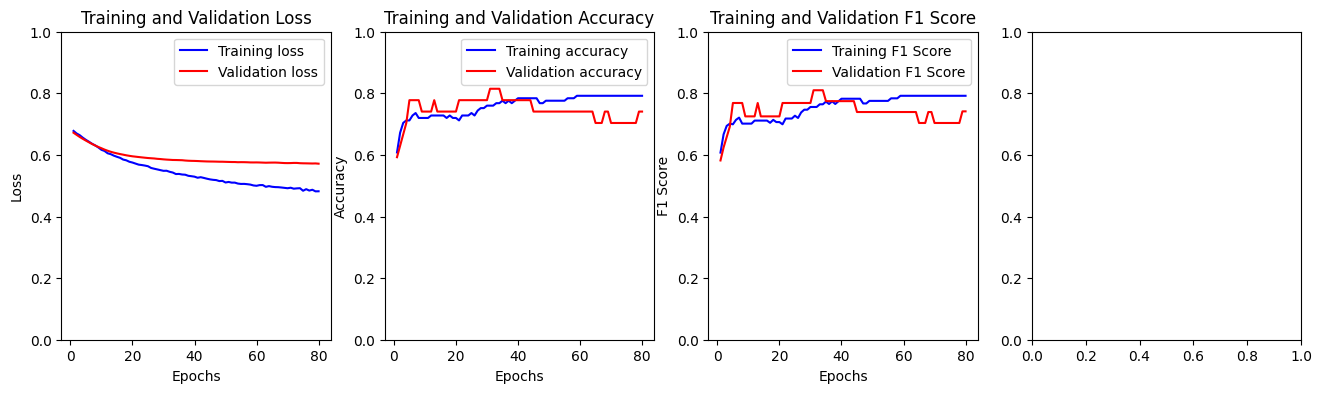

In [56]:
# Plotting the metrics
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(16, 4))

# Plot Loss
plt.subplot(1, 4, 1)
plt.plot(epochs, train_loss_history, 'b', label='Training loss')
plt.plot(epochs, val_loss_history, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()

# Plot Accuracy
plt.subplot(1, 4, 2)
plt.plot(epochs, train_accuracy_history, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy_history, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

# Plot F1 Score
plt.subplot(1, 4, 3)
plt.plot(epochs, train_f1_history, 'b', label='Training F1 Score')
plt.plot(epochs, val_f1_history, 'r', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.legend()

# Plot Gradient Norms for each parameter
plt.subplot(1, 4, 4)
# Compute the gradient norms for each parameter separately
num_params = len(gradient_norms_history[0][0])
for i in range(num_params):
    param_gradient_norms = [np.mean([epoch_norms[i] for epoch_norms in batch_norms]) for batch_norms in gradient_norms_history]
    plt.plot(epochs, param_gradient_norms, label=f'Param {i+1}')
plt.title('Gradient Norms for Each Parameter')
plt.xlabel('Epochs')
plt.ylabel('Gradient Norm')
plt.legend()

plt.tight_layout()
plt.show()

In [166]:
!tensorboard --logdir=runs

^C


In [25]:
# Visualization

# This website has got some awesome visualizations check it out:
# http://networkrepository.com/graphvis.php?d=./data/gsm50/labeled/cora.edges

#https://towardsdatascience.com/large-graph-visualization-tools-and-approaches-2b8758a1cd59

# igraph 